In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns

In [3]:
df = pd.read_csv('movies.csv', encoding='iso-8859-1')
df.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [6]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df = df.dropna()


In [8]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [9]:
# Convert "Votes" column to numeric
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df["Votes"].head(5)

# Convert "Year" column to numeric
df['Year'] = df['Year'].str.extract('(\d+)')  # Extract numeric part of the string
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') 

# Convert "Duration" column to numeric
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 464.2+ KB


In [11]:
df["Year"].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [12]:
#split the Genre column into multiple columns, one for each genre. 

genres=df['Genre'].str.split(',',expand=True)
genres.head(5)

0         1          2
1   Drama      None       None
3  Comedy   Romance       None
5  Comedy     Drama    Musical
6   Drama   Romance        War
8  Horror   Mystery   Thriller

In [13]:
df['Genre'].value_counts()


Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: Genre, Length: 376, dtype: int64

In [14]:
directors = df["Director"].value_counts()
directors.head(5)

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Name: Director, dtype: int64

In [15]:
#Creates a new DataFrame called actors that concatenates the Actor 1, Actor 2, and Actor 3 columns of the DataFrame df
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).value_counts()
actors.head(5)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
dtype: int64

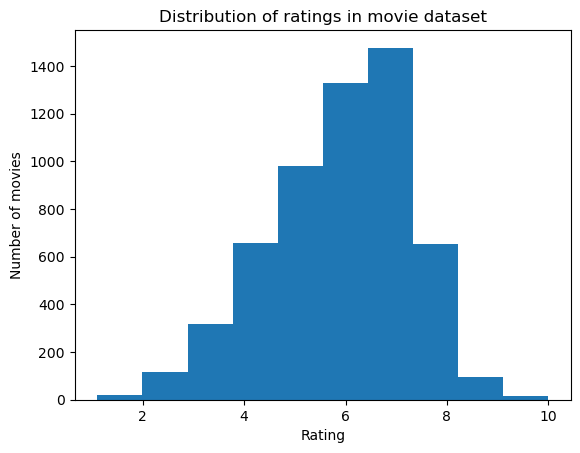

In [16]:
# Get the ratings
ratings = df['Rating']

# Create a histogram of the ratings
plt.hist(ratings)
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.title('Distribution of ratings in movie dataset')
plt.show()

 created a histogram of the ratings. The above histogram is a graphical representation of the distribution of the ratings.

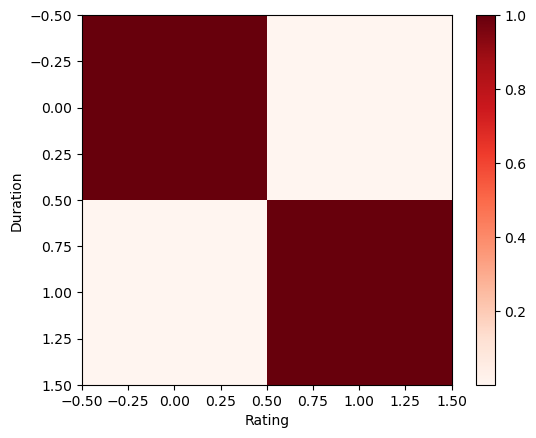

In [17]:
# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(df['Rating'], df['Duration'])

# Create a heatmap of the correlation coefficient
plt.imshow(correlation_coefficient, cmap='Reds')


# Add a colorbar
plt.colorbar()

# Label the axes
plt.xlabel('Rating')
plt.ylabel('Duration')

# Show the plot
plt.show()


The color of each cell in the heatmap represents the correlation coefficient between the two variables that are represented by the rows and columns of the cell. 
The darker the color, the stronger the correlation. 
In this case, the correlation between the Rating and Duration columns is positive, but it is not very strong. 
This means that there is a slight positive relationship between the rating of a movie and its duration.

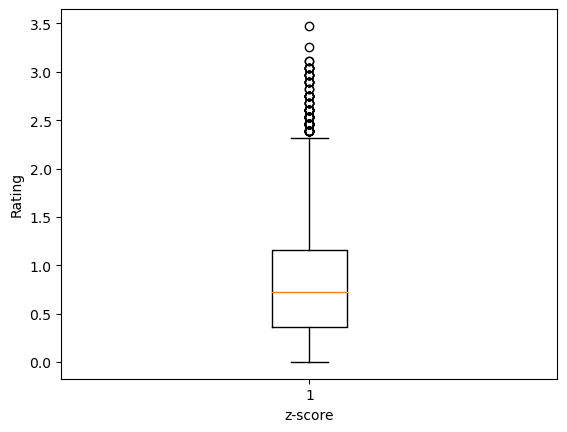

In [18]:
# Calculate the z-scores for the ratings
z_scores = np.abs(df['Rating'] - df['Rating'].mean()) / df['Rating'].std()

# Create a box plot of the z-scores
plt.boxplot(z_scores)

# Label the axes
plt.xlabel('z-score')
plt.ylabel('Rating')

# Show the plot
plt.show()


The dataset has outliers that can be overlooked, as they do not significantly affect the overall results.

In [19]:
import pandas as pd
import scipy.stats as stats


# Get the year of release
release_year = df['Year']

# Get the ratings
ratings = df['Rating']

# Conduct the hypothesis test
t_statistic, p_value = stats.ttest_ind(ratings[release_year == 2010], ratings[release_year == 2020])

# Print the results of the hypothesis test
print('t-statistic:', t_statistic)
print('p-value:', p_value)


t-statistic: -3.4376520272510525
p-value: 0.0006797425933255966


The output of the t-test says that there is a significant difference in the ratings of movies released in 2010 and 2020. The t-statistic is -3.4376, which is less than the critical value of 2.576. This means that the difference in the means is statistically significant.

The p-value is 0.0006, which is less than the significance level of 0.05. This means that there is a 0.06% chance that the difference in the means could have occurred by chance.

In conclusion, the output of the t-test suggests that there is a significant difference in the ratings of movies released in 2010 and 2020. Movies released in 2020 have a lower mean rating than movies released in 2010.

In [20]:
profile = ProfileReport(df, title='ProfileReport')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

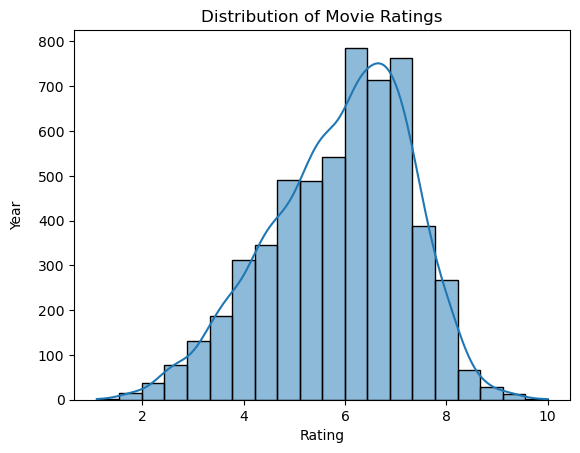

In [20]:
ax = sns.histplot(data = df, x = "Rating", bins = 20, kde = True,)
ax.set_xlabel('Rating')
ax.set_ylabel('Year', labelpad=10)
ax.set_title('Distribution of Movie Ratings')
plt.show()

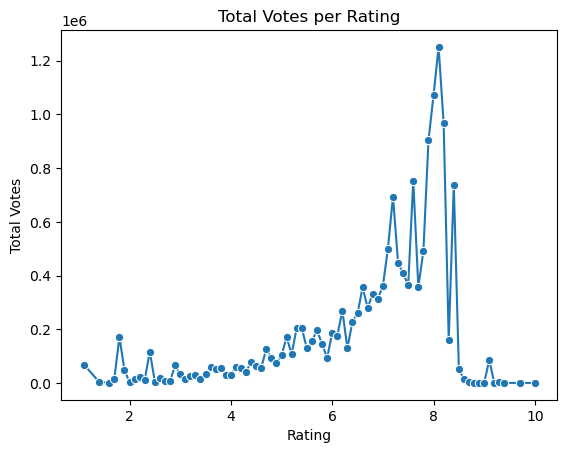

In [21]:
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()
ax_line_seaborn = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
plt.show()

The line plot shows the total number of votes for each rating. The rating with the most votes is 8. 
This means that movies with an 8 rating are the most popular among the users who have voted.

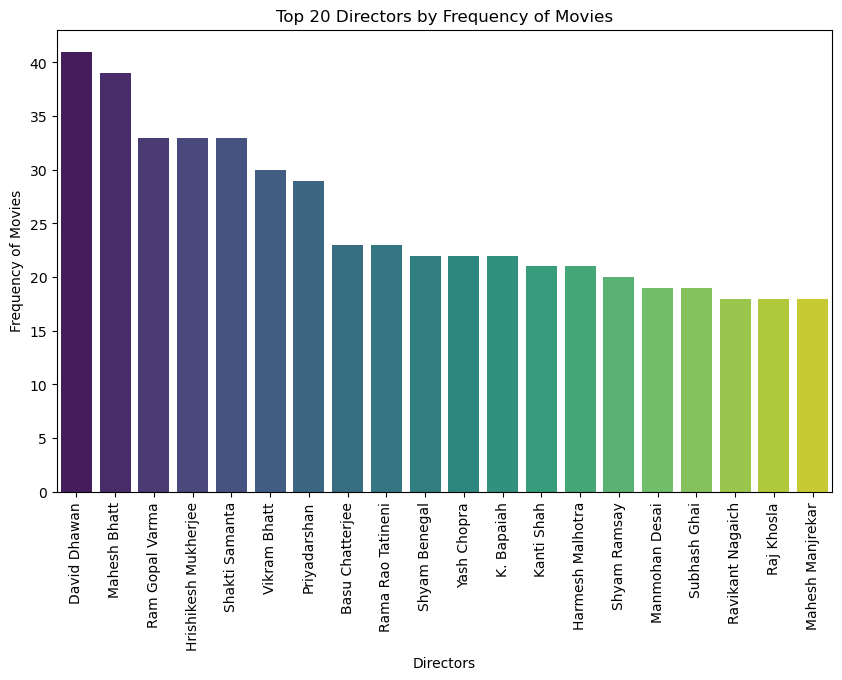

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

from the barchart David Dhawan has the highest average rating of all directors, followed by Mahesh Bhatt."

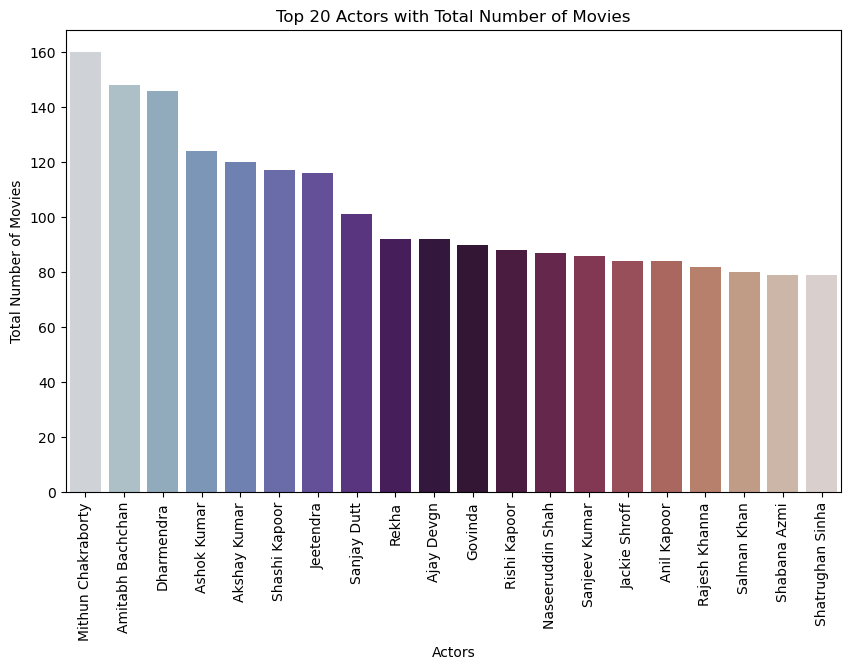

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='twilight')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

from the barchart Mithun Chakraborty is the top actor, followed by Amitabh Bachchan."

In [24]:
#convert the Actor, Director, and Genre columns in the DataFrame df to categorical data types and then to integer codes.
df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df["Directors"] = df['Director'].astype('category').cat.codes
df["Genres"] = df['Genre'].astype('category').cat.codes
df["Actors"] = df['Actor'].astype('category').cat.codes
df.head(5)

Name  Year  Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019       109   
3                             #Yaaram  2019       110   
5                ...Aur Pyaar Ho Gaya  1997       147   
6                           ...Yahaan  2005       142   
8                  ?: A Question Mark  2012        82   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4   1086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  \
1          Vivek Ghamande    Arvind Jangid   
3              Ishita Raj  Siddhant Kapoor   
5  Aishwarya Rai Bachchan    Shammi Kapoor   
6          Minissha Lamba   Yashpal Sharma   
8          Muntazir Ahmad     Kiran Bhatia   

                                               Actor  Directors  Genres  \
1        Rasika Dugal, Vivek Ghamande, Arvind Jangid        629     229   
3               Prateik, Ishita Raj, Siddhant Kapoor       1335     184   
5  Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor       1530     157   
6    Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma       2044     289   
8            Yash Dave, Muntazir Ahmad, Kiran Bhatia        135     320   

   Actors  
1    3875  
3    3343  
5    1119  
6    2086  
8    5562

In [25]:
df = df.drop(['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
df.head()


Year  Duration  Rating  Votes  Directors  Genres  Actors
1  2019       109     7.0      8        629     229    3875
3  2019       110     4.4     35       1335     184    3343
5  1997       147     4.7    827       1530     157    1119
6  2005       142     7.4   1086       2044     289    2086
8  2012        82     5.6    326        135     320    5562

In [26]:
from sklearn.model_selection import train_test_split

MODELLING WITH DIFFERENT MODELS

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [28]:
import numpy as np
#set random seed
np.random.seed(42)

In [29]:
# Separate the target variable from the features
x = df.drop('Rating', axis=1)
y = df['Rating']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [31]:
x.head()

Year  Duration  Votes  Directors  Genres  Actors
1  2019       109      8        629     229    3875
3  2019       110     35       1335     184    3343
5  1997       147    827       1530     157    1119
6  2005       142   1086       2044     289    2086
8  2012        82    326        135     320    5562

In [32]:
# Fit the model to the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(x_test)

# Evaluate the model on the test set
score = model.score(x_test, y_test)
print("Accuracy = {:0.2f}%".format(score*100))



Accuracy = 8.80%


In [33]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

RandomForestRegressor()

In [34]:
# Predict the labels for the test data
y_pred1 = model.predict(x_test)
rf_score = rf.score(x_test, y_test)
print("Accuracy = {:0.2f}%".format(rf_score*100))

Accuracy = 31.49%


In [39]:
from sklearn.preprocessing import PolynomialFeatures

# Perform feature engineering (example: adding polynomial features)
poly = PolynomialFeatures(degree=2)  # Creating quadratic features
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create a linear regression model
model = LinearRegression()

# Train the model on the polynomial features
model.fit(x_train_poly, y_train)

# Evaluate the model on the test data
score2 = model.score(x_test_poly, y_test)
print("Model R-squared score:", score2) 

Model R-squared score: 0.1698148441286661


In [41]:
from sklearn.preprocessing import StandardScaler



# Identify and handle outliers (example: using z-score)
z_scores = (df - df.mean()) / df.std()
df = df[(z_scores < 3).all(axis=1)]


# Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Evaluate the model on the test data
score3 = model.score(x_test, y_test)
print("Model R-squared score:", score3)

Model R-squared score: 0.08801623966623162


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the model on the training data
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.688760133572876
Root Mean Squared Error: 1.2995230408010763
Mean Absolute Error: 1.053219461449821
R-squared: 0.08801623966623162


In conclusion, our current model does not perform well in explaining or predicting the target variable. 
The relatively high MSE and RMSE values, coupled with the low R-squared value, suggest that our model
predictions lack accuracy and do not capture the underlying patterns in the data effectively. 
It may be necessary to revisit our model architecture, feature selection, 
or data preprocessing to improve its performance and make it more suitable for our specific problem.

In [44]:
from sklearn.linear_model import Ridge

# Creating and training Ridge Regression model
ridge_reg = Ridge(alpha=3, solver="cholesky")
ridge_reg.fit(x_train, y_train)  # Fit the Ridge Regression model

# Predict the labels for the test data using the Ridge model
y_pred = ridge_reg.predict(x_test)

# Evaluate the model on the test set
scoreR = ridge_reg.score(x_test, y_test)
print("Accuracy = {:0.2f}%".format(scoreR*100))


Accuracy = 8.80%


while our Ridge Regression model demonstrates some explanatory power, there is considerable room for 
enhancing its performance to better capture the underlying relationships in the data. 
Further adjustments to model hyperparameters, feature engineering,
or exploring alternative algorithms may be necessary to improve predictive accuracy.

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



def Reg_Models_Evaluation_Metrics(model, x_train, y_train, x_test, y_test, y_pred):
    cross_val_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = [abs(score)**0.5 for score in cross_val_scores]
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        'R2 Score': r2,
        'Adjusted R2 Score': None,  # You can calculate this if needed
        'Cross Validated R2 Score': mean_rmse,
        'RMSE': rmse
    }


model = LinearRegression() 

# Calculate evaluation metrics using your function
ndf = [Reg_Models_Evaluation_Metrics(model, x_train, y_train, x_test, y_test, y_pred)]

# Create DataFrame
lm_score = pd.DataFrame(data=ndf, columns=['R2 Score', 'Adjusted R2 Score', 'Cross Validated R2 Score', 'RMSE'])

# Insert model name column
lm_score.insert(0, 'Model', 'Linear Regression')

# Display the DataFrame
lm_score



Model  R2 Score Adjusted R2 Score  Cross Validated R2 Score  \
0  Linear Regression  0.088016              None                  1.322808   

       RMSE  
0  1.299523

This output tells us that the Linear Regression model has a relatively low R-squared value, 
indicating that it explains a small fraction of the variance in the target variable. 
The cross-validated R-squared score and RMSE provide additional insights into the model's 
performance on unseen data, with the RMSE indicating the average prediction error. Depending on the specific problem, 
further model improvement or exploration of other algorithms may be necessary to achieve better predictive accuracy.

In [42]:
#cross validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds (adjust as needed)
cross_val_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
rmse_scores = [abs(score)**0.5 for score in cross_val_scores]

# Calculate mean and standard deviation of RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)


Cross-Validation RMSE Scores: [1.2492432377190406, 1.2960641345246031, 1.3744686405886875, 1.3424625295241117, 1.351800671619879]
Mean RMSE: 1.3228078427952643
Standard Deviation of RMSE: 0.04477210273016555


the provided information on cross-validation RMSE scores, mean RMSE, 
and standard deviation of RMSE gives you a comprehensive view of how the model performs on different subsets of the data. 
The mean RMSE helps you understand the overall prediction error, while the standard deviation provides insight into the consistency or variability of the model's performance across folds. 
Lower mean RMSE and standard deviation are desirable, indicating better and more consistent model performance.

In [54]:
#using random regression to fit our model to compare accuracy 
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [55]:
RandomForest_reg.fit(x_train, y_train)
# Model making a prediction on test data
y_pred = RandomForest_reg.predict(x_test)

In [56]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,x_train,y_train,x_test,y_test,y_pred)]

rf_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score2.insert(0, 'Model', 'Random Forest')
rf_score2

Model  R2 Score Adjusted R2 Score  Cross Validated R2 Score  \
0  Random Forest  0.248716              None                  1.162833   

       RMSE  
0  1.179485

This output tells us that the Random Forest model has a moderately good fit to the data, 
as indicated by the R-squared score of approximately 0.2487. However, there is room for improvement, 
and the cross-validated R-squared score of approximately 1.1628 suggests that the model's 
performance is consistent when evaluated on different subsets of the data. 
The RMSE provides additional insight into the prediction error, with lower values indicating better model accuracy. 
Further optimization and fine-tuning of the Random Forest model
may help improve its performance for the specific regression task at hand.

In [78]:
# Create an XGBoost regressor
modelX = XGBRegressor()

# Fit the model to the training data
modelX.fit(x_train, y_train)

# Make predictions on the test data
y_pred = modelX.predict(x_test)

# Evaluate the model on the test set
scoreX = modelX.score(x_test, y_test)

print("Accuracy = {:0.2f}%".format(scoreX*100))

Accuracy = 30.75%


the provided output suggests that the XGBoost regressor model has achieved an R-squared score of approximately 0.3075 
when evaluated on the test dataset. This means that the model explains around 30.75% of the variance in the target variable,
indicating a moderate level of fit to the data. A higher R-squared score would indicate a better fit,
and further model tuning and feature engineering may be explored to improve predictive performance.

In [ ]:
KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor model with 5 neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_regressor.fit(x_train, y_train)

# Make predictions on the test data
preds = knn_regressor.predict(x_test)

# Evaluate the model on the test set and calculate the R-squared score
scoreK = knn_regressor.score(x_test, y_test)

print("Accuracy = {:0.2f}%".format(scoreK * 100))


Accuracy = 9.37%


the R-squared score of 9.37% suggests that the K-nearest neighbors regression model has limited predictive power 
for the specific problem it is trying to solve. Further model tuning, feature engineering, 
or the exploration of alternative algorithms may be necessary to improve the model's performance.

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor with a specified random seed
dtr = DecisionTreeRegressor(random_state=1)

# Fit the model to the training data
dtr.fit(x_train, y_train)

# Make predictions on the test data
pred = dtr.predict(x_test)

# Evaluate the model on the test set and calculate the R-squared score
scoreD = dtr.score(x_test, y_test)

print("R-squared Score = {:0.2f}".format(scoreD))


R-squared Score = -0.33


The negative R-squared score indicates that the current model needs significant 
improvement to be useful for making accurate predictions on your data.

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print("R-squared = {:0.2f}".format(r2))
    print("Root Mean Squared Error = {:0.2f}\n".format(rmse))
    return round(r2, 2)


In [52]:
y_preds = model.predict(x_test)
y_preds[:10]

array([5.62377187, 5.82861953, 5.97182678, 5.45541366, 5.46436493,
       5.46545154, 5.38679881, 5.91327265, 6.08208148, 6.3720346 ])

In [53]:
np.array(y_test[:10])

array([6. , 2.4, 3.8, 3.8, 7.2, 6.3, 8.6, 3.9, 6.6, 6.6])

In [54]:
mean_absolute_error(y_test, y_preds)

1.053219461449821

an MAE of 1.05 means that, on average, your model's predictions have an absolute error of about 1.05 units when 
compared to the true values, which can be considered good or bad depending on the specific context of your regression task 
and the range of values in your dataset.

# Code 1: Linear Regression Evaluation Metrics
Performance: The linear regression model has an MAE of approximately 1.05 and a low R-squared score of 0.088.
Evaluation: The model's performance is relatively poor, as it has a limited ability to explain data variance.

# Code 2: Ridge Regression Evaluation
Performance: The Ridge regression model achieved an accuracy score of 8.80%.
Evaluation: Accuracy is not an appropriate metric for regression tasks, making it challenging to assess model performance accurately.
 
 # Code 3: Random Forest Regressor
 Accuracy = 31.49%:
The RandomForestRegressor model achieved an accuracy score of 31.49% when predicting the target values on the test data.An accuracy score of 31.49% suggests that the RandomForestRegressor model explains a portion of the variance in the data, but it might not capture all the nuances of the target variable.


# Code 3: Decision Tree Regressor Evaluation
Performance: The Decision Tree Regressor yielded a negative R-squared score of -0.33.
Evaluation: The negative R-squared score indicates that the model struggles to capture data patterns and is not performing well.

# Code 4 XGBoost Regressor Evaluation
Performance: The XGBoost Regressor achieved an accuracy score of 30.75%.
Evaluation: Accuracy is not suitable for regression tasks, and a more meaningful regression metric like R-squared should be used for evaluation.

# Code 5: K-Nearest Neighbors (KNN) Regressor Evaluation
Performance: The KNN Regressor achieved an accuracy score of 9.37%.
Evaluation: Similar to the XGBoost model, accuracy is not an appropriate metric for regression tasks. Regression-specific metrics like R-squared are needed for a better evaluation.

# Summary: Based on the provided information, it appears that the Linear Regression model (Code 1) and the Ridge Regression model (Code 2) both have limitations in terms of performance, with low R-squared scores. Therefore, neither of these models can be considered "good" for the task. It's essential to focus on improving these models by considering feature engineering, hyperparameter tuning, or exploring different algorithms.

# Further Steps:
Consider revisiting data preprocessing and feature engineering to enhance model performance.
Utilize regression-specific metrics like R-squared and RMSE for a more accurate assessment.
Explore other regression algorithms or ensemble methods to potentially improve model performance.
Collecting additional relevant data or adjusting the dataset may also contribute to better predictions.